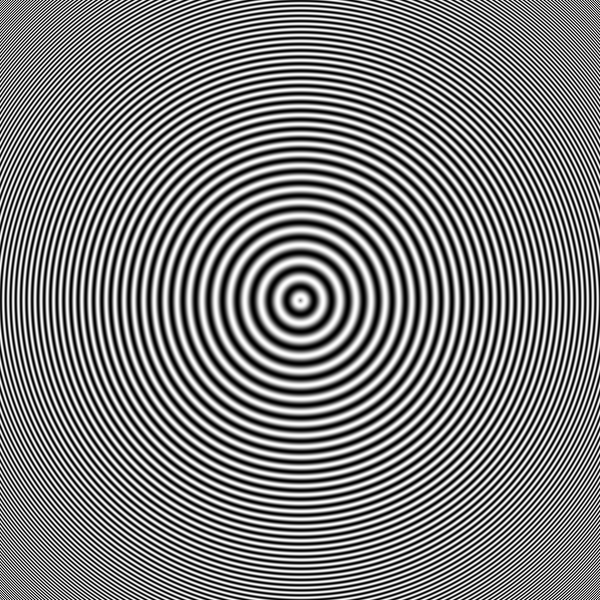

In [8]:
from PIL import Image, ImageDraw
import numpy
M=600
N=600
Cx=M/2
Cy=N/2

image=Image.new('RGB',(M,N))
draw=ImageDraw.Draw(image)

for m in range(M):
    for n in range(N):
        #r=((N-n+1)*(m-Cx)*(m-Cx)/(M-m+1)+(M-m+1)*(n-Cy)*(n-Cy)/(N-n+1))**0.5
        r=((m-Cx)*(m-Cx)+(n-Cy)*(n-Cy))**0.5
        S=int(127*(numpy.sin(r/(3-r/200))+1))
        
        draw.point((m,n),(S,S,S))
image



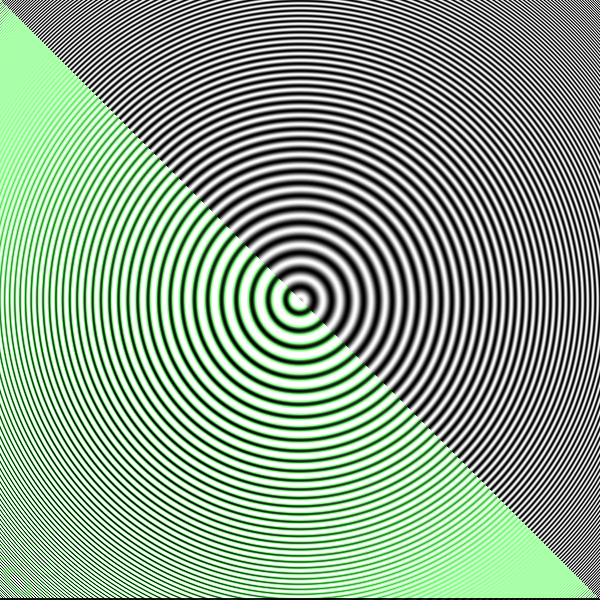

In [23]:
image2=image.copy()
#draw=ImageDraw.Draw(image)
for x in range(M):
    for y in range(N):
        if x<=y: 
            if x<=M-3 and y<=N-3:
                r, g, b = image2.getpixel((x, y))
                r2, g2, b2 = image2.getpixel((x+1, y+1))
                r3, g3, b3 = image2.getpixel((x+2, y+2))
                '''
                red = int(1/3*(r+r2+r3))
                green = int(1/3*(g+g2+g3))
                blue = int(1/3*(b+b2+b3))
                #'''
                #'''
                red = int(1/3*(r+2*r2+r3))
                green = int(1/3*(2*g+4*g2+2*g3))
                blue = int(1/3*(b+2*b2+b3))
                #'''

                image2.putpixel((x, y), (red, green, blue))
            
            else:
                r, g, b = image2.getpixel((x, y))
                red = int(r*1/9)
                green = int(g*1/9)
                blue = int(b*1/9)
                
                image2.putpixel((x, y), (red, green, blue))
            
            
    else:
        continue
    
image2

In [ ]:
#Быстрое преобразование Фурье считается элементарно даже на втором Пентиуме. 
#Для изучения основ на мой взгляд лучше всего подходит Processing. Вот код функции свертки.

color convolution(int x, int y, float[][] matrix,int matrixsize, PImage img)
{
  float rtotal = 0.0;
  float gtotal = 0.0;
  float btotal = 0.0;
  int offset = matrixsize / 2;
  for (int i = 0; i < matrixsize; i++){
    for (int j= 0; j < matrixsize; j++){
      // What pixel are we testing
      int xloc = x+i-offset;
      int yloc = y+j-offset;
      int loc = xloc + img.width*yloc;
      // Make sure we haven't walked off our image, we could do better here
      loc = constrain(loc,0,img.pixels.length-1);
      // Calculate the convolution
      rtotal += (red(img.pixels[loc]) * matrix[i][j]);
      gtotal += (green(img.pixels[loc]) * matrix[i][j]);
      btotal += (blue(img.pixels[loc]) * matrix[i][j]);
    }
  }
  // Make sure RGB is within range
  rtotal = constrain(rtotal,0,255);
  gtotal = constrain(gtotal,0,255);
  btotal = constrain(btotal,0,255);
  // Return the resulting color
  return color(rtotal,gtotal,btotal);
}